In [32]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

stock = pd.read_csv("C:/Users/insun/Desktop/인지개/13_week/stock.csv")

samsung_stock = stock[stock['종목명'] == '삼성전자']
print(samsung_stock.head())

            일자     종목코드   종목명       거래량     시가     고가     저가     종가
746   20210601  A005930  삼성전자  14058401  80500  81300  80100  80600
2746  20210602  A005930  삼성전자  16414644  80400  81400  80300  80800
4746  20210603  A005930  삼성전자  29546007  81300  83000  81100  82800
6746  20210604  A005930  삼성전자  18112259  82700  82700  81500  82200
8746  20210607  A005930  삼성전자  16496197  82700  82800  81600  81900


In [34]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [35]:
stock['Name'].value_counts()

Name
3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: count, Length: 2000, dtype: int64

In [36]:
stock_AJ = stock[stock['Code']=='A060310']

In [37]:
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [38]:
stock_AJ

,Date,Open,High,Low,Close,Volume
0,20210601,2890,2970,2885,2920,166690
2000,20210602,2915,2975,2830,2900,134833
4000,20210603,2900,2925,2875,2900,144470
6000,20210604,2930,3120,2920,2950,934224
8000,20210607,3000,3150,2955,3150,946560
...,...,...,...,...,...,...
978000,20230523,2300,2315,2260,2285,117084
980000,20230524,2280,2300,2255,2280,67101
982000,20230525,2260,2285,2235,2245,91789
984000,20230526,2245,2915,2230,2910,13590249


In [39]:
stock_AJ['Date'].value_counts()

Date
20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: count, Length: 494, dtype: int64

In [40]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [41]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
0,0.362534,0.347349,0.420705,0.001621
2000,0.372311,0.349177,0.396476,0.001207
4000,0.366445,0.330896,0.416300,0.001332
6000,0.378178,0.402194,0.436123,0.011601
8000,0.405553,0.413163,0.451542,0.011761
...,...,...,...,...
978000,0.131795,0.107861,0.145374,0.000976
980000,0.123973,0.102377,0.143172,0.000326
982000,0.116152,0.096892,0.134361,0.000647
984000,0.110285,0.327239,0.132159,0.176155


In [42]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.388270,0.371748,0.428200,0.011022
std,0.223416,0.216861,0.243649,0.053506
min,0.000000,0.000000,0.000000,0.000000
25%,0.158193,0.154022,0.174559,0.001332
50%,0.390888,0.384826,0.431718,0.002464
75%,0.534611,0.504113,0.583700,0.005128
max,1.000000,1.000000,1.000000,1.000000


In [43]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [44]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.12006257332342345, 0.09506398537129565, 0.12995594713083897, 0.0003577772826598893], [0.10833007430159054, 0.0840950639823, 0.11233480175716587, 0.0009727870310734309], [0.09855299178339645, 0.08775137111196522, 0.11894273127229328, 0.0007246039889027013], [0.11028549080522936, 0.09872029250096087, 0.13656387664596636, 0.0011905842931963296], [0.13179507234525636, 0.10603290676029131, 0.1519823788479303, 0.0026100045850412784], [0.12983965584161755, 0.11517367458445435, 0.14096916298938464, 0.0014869269114462914], [0.13179507234525636, 0.10786106032512392, 0.14537444933280289, 0.0009760245403724937], [0.12397340633070109, 0.10237659963062609, 0.14317180616109376, 0.0003261433062557933], [0.11615174031614581, 0.09689213893612826, 0.1343612334742572, 0.0006471378025419926], [0.11028549080522936, 0.32723948810503695, 0.1321585903025481, 0.1761547272524533]] -> [0.39539347407311354]


In [45]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [46]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

In [48]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

C:\Users\insun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 10, 20)              │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2211
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1652
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1003
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0166
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124
Epoch 14/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130
Epoch 15/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114
Epoch 16/70
12/12

In [50]:
model.evaluate(test_X, test_y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074  


0.008312330581247807

In [51]:
y_pred = model.predict(test_X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [52]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.008312330632856113


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


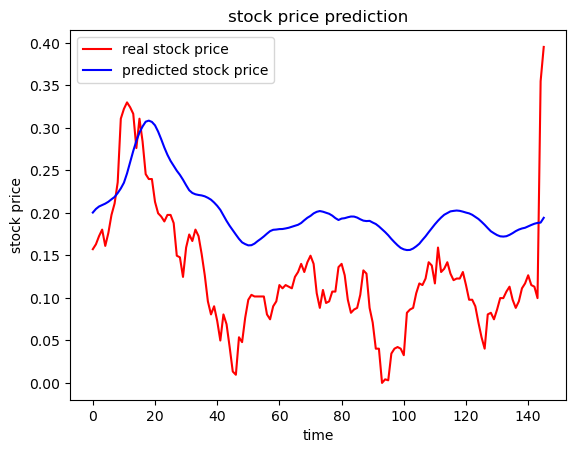

In [53]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()